# 1. Import Dependencies

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# 2.EDA

In [4]:
df = pd.read_csv('Stars.csv')
df.head(5)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [6]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [7]:
#no null
df.isna().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [8]:
print(df.Color.value_counts())
print(f"There Are {df.Color.value_counts().shape[0]} Star Colors")

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
Orange                  2
Whitish                 2
yellowish               2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Blue-White              1
Orange-Red              1
Name: Color, dtype: int64
There Are 17 Star Colors


In [9]:
print(df.Spectral_Class.value_counts())
print(f"There Are {df.Spectral_Class.value_counts().shape[0]} Star Spectral Class")

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64
There Are 7 Star Spectral Class


## 2.1 Correlation 

### 2.1.1 Pearson Correlation

In [10]:
features = ["Temperature","L","R","A_M"]
pearson_corr = df[features].corr(method="pearson")

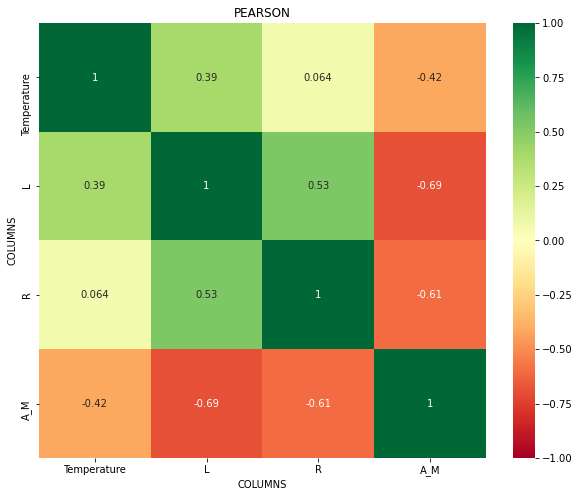

In [11]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(pearson_corr,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

### 2.1.2 Spearman Correlation

In [12]:
features = ["Temperature","L","R","A_M"]
corrSpearman = df[features].corr(method="spearman")

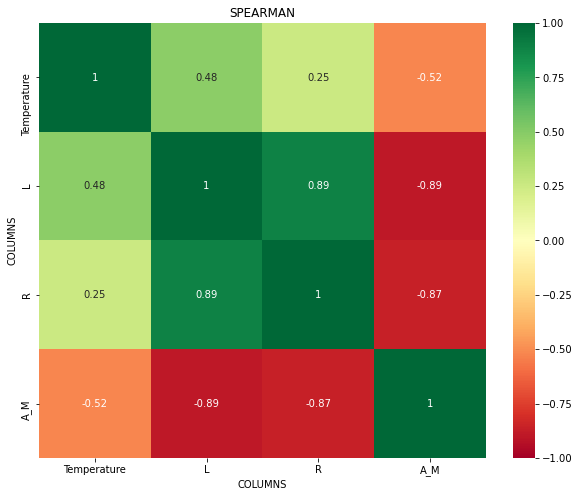

In [13]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("SPEARMAN")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

# 3.Preprocessing

## 3.1 Encoding 

*   One hot Encoding
*   Dummy Encoding
*   Label Encoding


### 3.1.1 Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pandas import get_dummies
df_dummy_encoding = df.copy()

labelEncoder = LabelEncoder()
df_label_encoding = df.copy()

df_label_encoding['Color_Stars'] = labelEncoder.fit_transform(df_label_encoding['Color'])
df_label_encoding['Spectral_Class_Stars'] = labelEncoder.fit_transform(df_label_encoding['Spectral_Class'])
df_label_encoding = df_label_encoding.drop(['Color', 'Spectral_Class'], axis = 1)

df_dummy_encoding = df_label_encoding

In [15]:
df_label_encoding

,Temperature,L,R,A_M,Type,Color_Stars,Spectral_Class_Stars
0,3068,0.002400,0.1700,16.12,0,8,5
1,3042,0.000500,0.1542,16.60,0,8,5
2,2600,0.000300,0.1020,18.70,0,8,5
3,2800,0.000200,0.1600,16.65,0,8,5
4,1939,0.000138,0.1030,20.06,0,8,5
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,6
236,30839,834042.000000,1194.0000,-10.63,5,0,6
237,8829,537493.000000,1423.0000,-10.73,5,9,0
238,9235,404940.000000,1112.0000,-11.23,5,9,0


### 3.1.2 One Hot Encoding

In [16]:
oneHotEncoder = OneHotEncoder()
df_onehot_encoding = df.copy()

onehot_encoding_df = pd.DataFrame(oneHotEncoder.fit_transform(df_onehot_encoding[['Color', 'Spectral_Class']]).toarray())
df_onehot_encoding = df_onehot_encoding.join(onehot_encoding_df)
df_onehot_encoding = df_onehot_encoding.drop(['Color', 'Spectral_Class'], axis = 1)

df_dummy_encoding = df_onehot_encoding

In [17]:
df_onehot_encoding

,Temperature,L,R,A_M,Type,0,1,2,3,4,...,14,15,16,17,18,19,20,21,22,23
0,3068,0.002400,0.1700,16.12,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236,30839,834042.000000,1194.0000,-10.63,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
237,8829,537493.000000,1423.0000,-10.73,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
238,9235,404940.000000,1112.0000,-11.23,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.1.3 Dummy Encoding

In [18]:
df_dummy_encoding = df.copy()

dummy_encoding_df1 = get_dummies(df_dummy_encoding.Color)
dummy_encoding_df2 = get_dummies(df_dummy_encoding.Spectral_Class)

df_dummy_encoding = df_dummy_encoding.join(dummy_encoding_df1)
df_dummy_encoding = df_dummy_encoding.join(dummy_encoding_df2)
df_dummy_encoding = df_dummy_encoding.drop(['Color', 'Spectral_Class'], axis = 1)

df_dummy_encoding

,Temperature,L,R,A_M,Type,Blue,Blue White,Blue white,Blue-White,Blue-white,...,white,yellow-white,yellowish,A,B,F,G,K,M,O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numpy_array = df_dummy_encoding.A_M.to_numpy()
scaled = scaler.fit_transform(numpy_array.reshape(-1,1))

df_dummy_encoding_mnb = df_dummy_encoding.copy()
df_dummy_encoding_mnb.A_M = scaled
df_dummy_encoding_mnb.describe()

,Temperature,L,R,A_M,Type,Blue,Blue White,Blue white,Blue-White,Blue-white,...,white,yellow-white,yellowish,A,B,F,G,K,M,O
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,0.509768,2.500000,0.233333,0.041667,0.016667,0.004167,0.108333,...,0.012500,0.033333,0.008333,0.079167,0.191667,0.070833,0.004167,0.025000,0.462500,0.166667
std,9552.425037,179432.244940,517.155763,0.329347,1.711394,0.423836,0.200244,0.128287,0.064550,0.311450,...,0.111335,0.179881,0.091096,0.270563,0.394435,0.257082,0.064550,0.156451,0.499634,0.373457
min,1939.000000,0.000080,0.008400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,0.177846,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5776.000000,0.070500,0.762500,0.632677,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15055.500000,198050.000000,42.750000,0.801048,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,40000.000000,849420.000000,1948.500000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.2 PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca_8comp = PCA(n_components = 8, whiten = True)
pca_5comp = PCA(n_components = 5, whiten = True)

### 8 Component

In [22]:
df_8comp = df_dummy_encoding_mnb.iloc[:,5:22]
pca1 = pca_8comp.fit(df_8comp)
print(pca1.explained_variance_ratio_)
print(sum(pca1.explained_variance_ratio_))

[0.46683476 0.20916857 0.09265388 0.05298693 0.04343655 0.02853525
 0.02068657 0.01756955]
0.9318720456910119


### 5 Component

In [23]:
df_5comp = df_dummy_encoding_mnb.iloc[:,5:22]
pca2 = pca_5comp.fit(df_5comp)
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

[0.46683476 0.20916857 0.09265388 0.05298693 0.04343655]
0.86508067536931


## 3.3 Normalization


*   MinMaxScaler
*   StandardScaler
*   Normalizer



### 3.3.1 MinMaxScaler

In [26]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

In [27]:
df_mmscaler = df_dummy_encoding_mnb.iloc[:,0:4]
df_dummy_encoding_mnb.iloc[:,0:4] = minmaxscaler.fit_transform(df_mmscaler)

df_dummy_encoding_mnb.head()

,Temperature,L,R,A_M,Type,Blue,Blue White,Blue white,Blue-White,Blue-white,...,white,yellow-white,yellowish,A,B,F,G,K,M,O
0,0.029663,2.731275e-09,0.000083,0.876798,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.028980,4.944550e-10,0.000075,0.891807,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.017367,2.590003e-10,0.000048,0.957473,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.022622,1.412729e-10,0.000078,0.893371,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.000000,6.828189e-11,0.000049,1.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 3.3.2 StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler
standartscaler = StandardScaler()

In [29]:
df_sscaler = df_dummy_encoding_mnb.iloc[:,0:4]
df_dummy_encoding_mnb.iloc[:,0:4] = standartscaler.fit_transform(df_sscaler)

df_dummy_encoding_mnb.head()

,Temperature,L,R,A_M,Type,Blue,Blue White,Blue white,Blue-White,Blue-white,...,white,yellow-white,yellowish,A,B,F,G,K,M,O
0,-0.779382,-0.598624,-0.459210,1.116745,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.782110,-0.598624,-0.459241,1.162414,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.828477,-0.598624,-0.459342,1.362213,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.807496,-0.598624,-0.459229,1.167171,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.897819,-0.598624,-0.459340,1.491607,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 3.3.3 Normalizer

In [30]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [31]:
#df_norm = df_dummy_encoding_mnb.iloc[:,0:4]
#df_dummy_encoding_mnb.iloc[:,0:4] = normalizer.fit_transform(df_norm)

#df_dummy_encoding_mnb.head()

# 4.Model Building

## 4.1 Train Test Split

In [ ]:
#star types
types = df_dummy_encoding_mnb.iloc[:,4].values
print(types.shape)

(240,)


In [ ]:
#star features
df_X = df_dummy_encoding_mnb.drop(['Type'], axis = 1)
print(df_X.shape)

(240, 28)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X,types,test_size=0.30,random_state=44)
print(X_train.shape)
print(y_train.shape)
print(y_test.reshape(-1).shape)

(168, 28)
(168,)
(72,)


In [ ]:
y_train_flatten = y_train.reshape(-1)
y_yest_flatten = y_test.reshape(-1)

## 4.2 Naive Bayes
GaussianNB, BernoulliNB and MultinomialNB 

In [ ]:
gaussianNB = GaussianNB()
bernoulliNB = BernoulliNB()
multinomialNB = MultinomialNB()

In [ ]:
gaussianNB.fit(X_train, y_train_flatten)
bernoulliNB.fit(X_train, y_train_flatten)
multinomialNB.fit(X_train, y_train_flatten

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
result_gnb = gaussianNB.predict(X_test)
result_bnb = bernoulliNB.predict(X_test)
result_mnb = multinomialNB.predict(X_test)

### Accuracy / Loss

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, mean_squared_error
accuracy_gnb = accuracy_score(y_test, result_gnb)
accuracy_bnb = accuracy_score(y_test, result_bnb)
accuracy_mnb = accuracy_score(y_test, result_mnb)

loss_gnb = mean_squared_error(y_test, result_gnb)
loss_bnb = mean_squared_error(y_test, result_bnb)
loss_mnb = mean_squared_error(y_test, result_mnb)

print('GaussianNB Acc: {:.2f},  BernoulliNB Acc: {:.2f},  MultinomialNB Acc: {:.2f}'.format(accuracy_gnb, accuracy_bnb, accuracy_mnb))
print('GaussianNB MSE Loss: {:.2f},  BernoulliNB MSE Loss: {:.2f},  MultinomialNB MSE Loss: {:.2f}'.format(loss_gnb, loss_bnb, loss_mnb))

GaussianNB Acc: 0.97,  BernoulliNB Acc: 0.56,  MultinomialNB Acc: 0.67
GaussianNB MSE Loss: 0.03,  BernoulliNB MSE Loss: 3.85,  MultinomialNB MSE Loss: 1.00


In [ ]:
print(classification_report(y_test, result_gnb))#sensitivity = recall, specificity = precision    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         7
           3       1.00      0.80      0.89        10
           4       0.89      1.00      0.94        17
           5       1.00      1.00      1.00         9

    accuracy                           0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.98      0.97      0.97        72



In [ ]:
print(classification_report(y_test, result_bnb, zero_division = 1))

              precision    recall  f1-score   support

           0       0.34      1.00      0.51        14
           1       1.00      0.00      0.00        15
           2       0.88      1.00      0.93         7
           3       0.89      0.80      0.84        10
           4       0.79      0.65      0.71        17
           5       1.00      0.00      0.00         9

    accuracy                           0.56        72
   macro avg       0.82      0.57      0.50        72
weighted avg       0.79      0.56      0.47        72



In [ ]:
print(classification_report(y_test, result_mnb, zero_division = 1))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        14
           1       0.00      0.00      0.00        15
           2       1.00      1.00      1.00         7
           3       1.00      0.80      0.89        10
           4       0.79      0.65      0.71        17
           5       1.00      0.89      0.94         9

    accuracy                           0.67        72
   macro avg       0.71      0.72      0.70        72
weighted avg       0.64      0.67      0.63        72



### Confusion Matrix

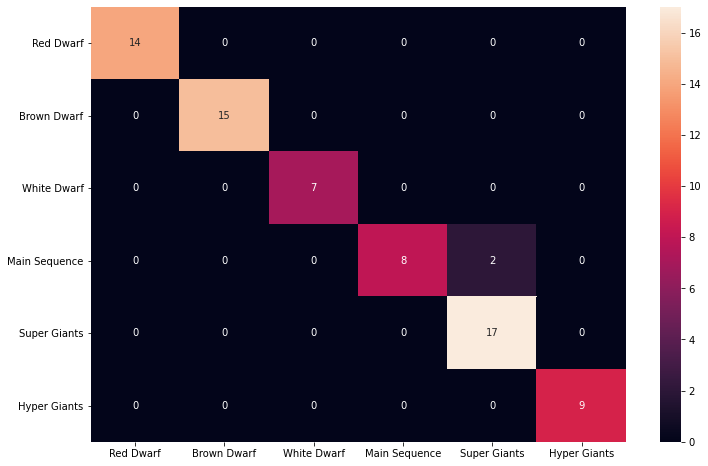

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
classes = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']

plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test,result_gnb), annot=True,
            xticklabels = classes, yticklabels = classes)

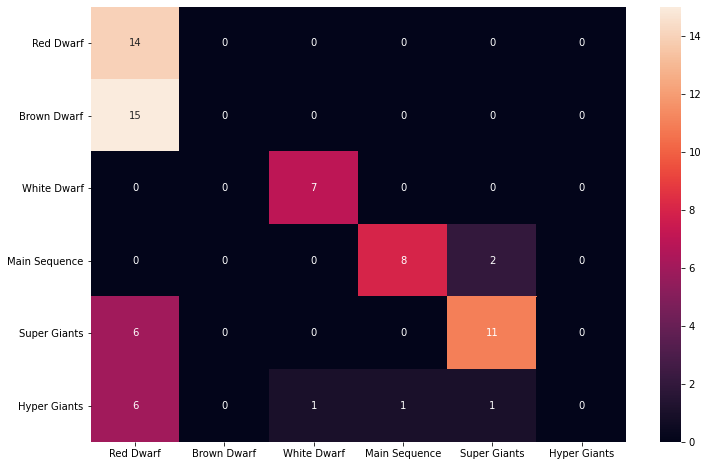

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test,result_bnb), annot=True,
            xticklabels = classes, yticklabels = classes)

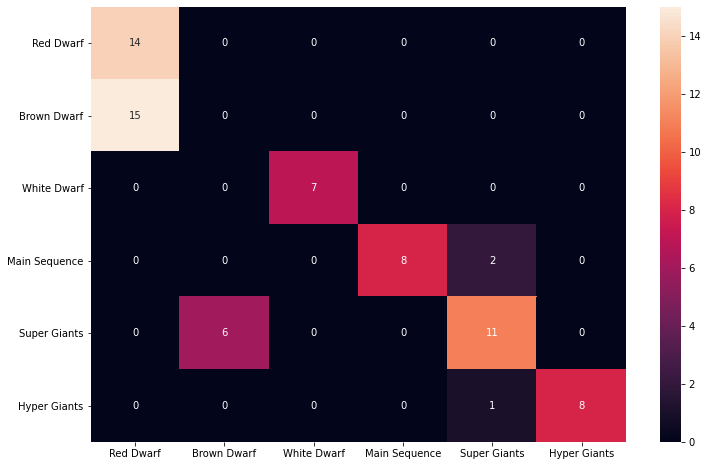

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test,result_mnb), annot=True,
            xticklabels = classes, yticklabels = classes)

### Prediction

In [ ]:
def class_name(x):
  return classes[x[0]]

In [ ]:
item = gaussianNB.predict(X_test.iloc[0].to_numpy().reshape(1,-1))
print(class_name(item))

Super Giants


## 4.3 SVM

In [ ]:
from sklearn.svm import SVC

svc_l = SVC(kernel='linear', random_state = 0)
svc_l.fit(X_train, y_train)

svc_p = SVC(kernel='poly', random_state = 0)
svc_p.fit(X_train, y_train)

svc_s = SVC(kernel='sigmoid', random_state = 0)
svc_s.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### Accuracy / Loss

In [ ]:
result_svc_l = svc_l.predict(X_test)

accuracy_svc_l = accuracy_score(y_test, result_svc_l)
loss_svc_l = mean_squared_error(y_test, result_svc_l)

result_svc_p = svc_p.predict(X_test)

accuracy_svc_p = accuracy_score(y_test, result_svc_p)
loss_svc_p = mean_squared_error(y_test, result_svc_p)

result_svc_s = svc_s.predict(X_test)

accuracy_svc_s = accuracy_score(y_test, result_svc_s)
loss_svc_s = mean_squared_error(y_test, result_svc_s)

print('SVM Linear Acc: {:.2f},  SVM Linear Loss: {:.2f}'.format(accuracy_svc_l, loss_svc_l))
print('SVM Poly Acc: {:.2f},  SVM Poly Loss: {:.2f}'.format(accuracy_svc_p, loss_svc_p))
print('SVM Sigmoid Acc: {:.2f},  SVM Sigmoid Loss: {:.2f}'.format(accuracy_svc_s, loss_svc_s))

SVM Linear Acc: 0.83,  SVM Linear Loss: 0.17
SVM Poly Acc: 0.97,  SVM Poly Loss: 0.03
SVM Sigmoid Acc: 0.68,  SVM Sigmoid Loss: 1.57


In [ ]:
print(classification_report(y_test, result_svc_l))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        14
           1       1.00      0.33      0.50        15
           2       1.00      1.00      1.00         7
           3       1.00      0.80      0.89        10
           4       0.89      1.00      0.94        17
           5       1.00      1.00      1.00         9

    accuracy                           0.83        72
   macro avg       0.91      0.86      0.85        72
weighted avg       0.89      0.83      0.82        72



In [ ]:
print(classification_report(y_test, result_svc_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         7
           3       1.00      0.80      0.89        10
           4       0.89      1.00      0.94        17
           5       1.00      1.00      1.00         9

    accuracy                           0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.98      0.97      0.97        72



In [ ]:
print(classification_report(y_test, result_svc_s))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57        14
           1       0.00      0.00      0.00        15
           2       1.00      1.00      1.00         7
           3       1.00      0.80      0.89        10
           4       0.85      0.65      0.73        17
           5       1.00      1.00      1.00         9

    accuracy                           0.68        72
   macro avg       0.71      0.74      0.70        72
weighted avg       0.64      0.68      0.63        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

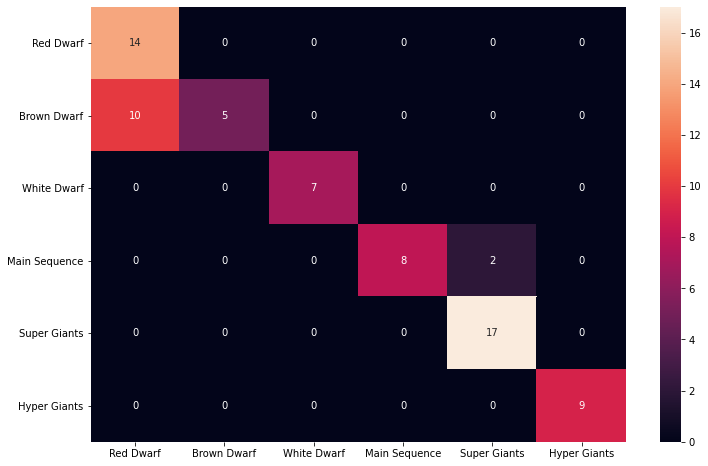

In [ ]:
classes = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']

plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test, result_svc_l), annot=True,
            xticklabels = classes, yticklabels = classes)

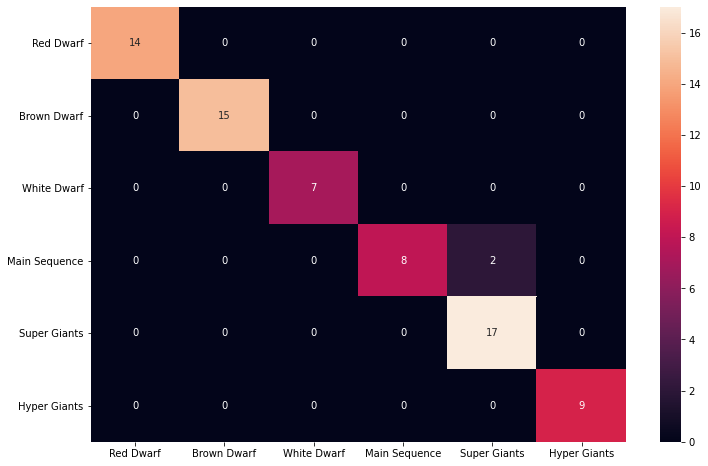

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test, result_svc_p), annot=True,
            xticklabels = classes, yticklabels = classes)

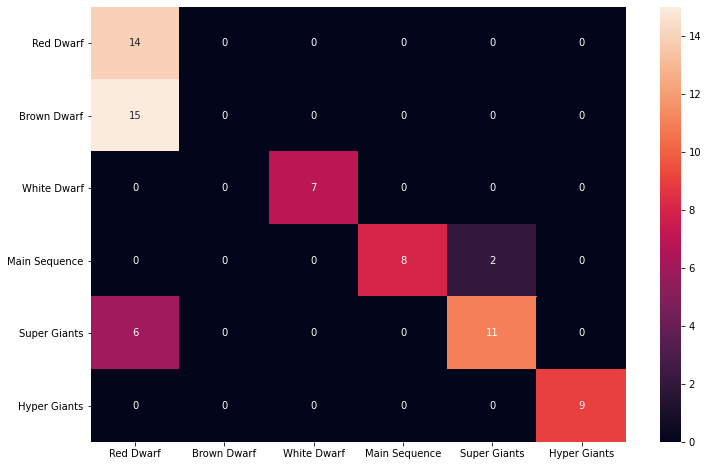

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test, result_svc_s), annot=True,
            xticklabels = classes, yticklabels = classes)

### Prediction

In [ ]:
item = svc_l.predict(X_test.iloc[0].to_numpy().reshape(1,-1))
print(class_name(item))

Super Giants


## 4.4 Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

clf_t = MLPClassifier(random_state=0, hidden_layer_sizes=50, activation='tanh', max_iter=300) 
clf_t.fit(X_train, y_train)

clf450_r = MLPClassifier(random_state=0, hidden_layer_sizes=50, activation='relu', max_iter=450)
clf450_r.fit(X_train, y_train)

clf600_r = MLPClassifier(random_state=0, hidden_layer_sizes=100, activation='relu', max_iter=600)
clf600_r.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (450) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=600,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
result_clf_t = clf_t.predict(X_test)

accuracy_clf_t = accuracy_score(y_test, result_clf_t)
loss_clf_t = mean_squared_error(y_test, result_clf_t)

print('50 hidden layer, activation tanh, iteration 300')
print('NN Acc: {:.2f},  NN Loss: {:.2f}'.format(accuracy_clf_t, loss_clf_t))
print('------------------------------------')

result_clf450_r = clf450_r.predict(X_test)

accuracy_clf450_r = accuracy_score(y_test, result_clf450_r)
loss_clf450_r = mean_squared_error(y_test, result_clf450_r)

print('100 hidden layer, activation relu, iteration 450')
print('NN Acc: {:.2f},  NN Loss: {:.2f}'.format(accuracy_clf450_r, loss_clf450_r))
print('------------------------------------')

result_clf600_r = clf600_r.predict(X_test)

accuracy_clf600_r = accuracy_score(y_test, result_clf600_r)
loss_clf600_r = mean_squared_error(y_test, result_clf600_r)

print('200 hidden layer, activation relu, iteration 600')
print('NN Acc: {:.2f},  NN Loss: {:.2f}'.format(accuracy_clf600_r, loss_clf600_r))

50 hidden layer, activation tanh, iteration 300
NN Acc: 0.79,  NN Loss: 0.88
------------------------------------
100 hidden layer, activation relu, iteration 450
NN Acc: 0.96,  NN Loss: 0.04
------------------------------------
200 hidden layer, activation relu, iteration 600
NN Acc: 1.00,  NN Loss: 0.00


In [ ]:
print(classification_report(y_test, result_clf_t))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       0.57      0.53      0.55        15
           2       1.00      1.00      1.00         7
           3       1.00      0.80      0.89        10
           4       0.85      0.65      0.73        17
           5       1.00      1.00      1.00         9

    accuracy                           0.79        72
   macro avg       0.85      0.83      0.83        72
weighted avg       0.81      0.79      0.79        72



In [ ]:
print(classification_report(y_test, result_clf450_r))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.87      0.93        15
           2       1.00      1.00      1.00         7
           3       1.00      0.90      0.95        10
           4       0.94      1.00      0.97        17
           5       1.00      1.00      1.00         9

    accuracy                           0.96        72
   macro avg       0.97      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



In [ ]:
print(classification_report(y_test, result_clf600_r))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00         9

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



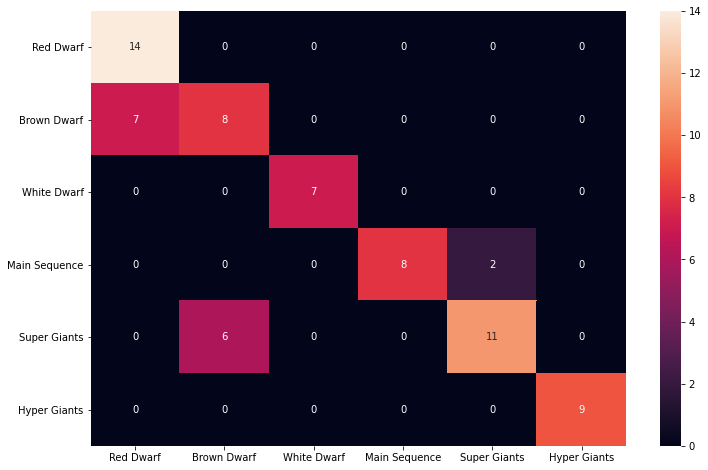

In [ ]:
classes = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']

plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test, result_clf_t), annot=True,
            xticklabels = classes, yticklabels = classes)

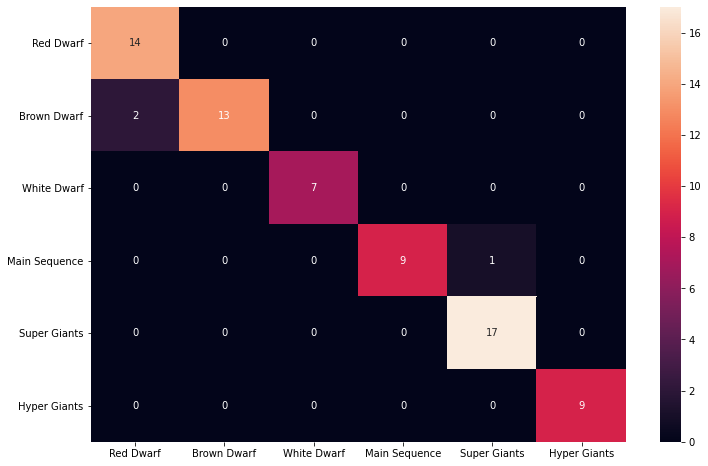

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test, result_clf450_r), annot=True,
            xticklabels = classes, yticklabels = classes)

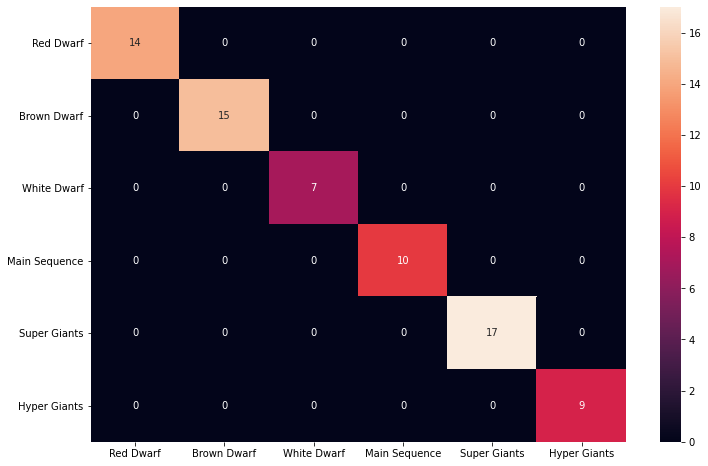

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test, result_clf600_r), annot=True,
            xticklabels = classes, yticklabels = classes)

In [ ]:
item = clf450_r.predict(X_test.iloc[0].to_numpy().reshape(1,-1))
print(class_name(item))

Super Giants


## 4.5 K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_50 = KNeighborsClassifier(n_neighbors=50, metric='minkowski', p = 2)
knn_50.fit(X_train, y_train)

knn_10 = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p = 2)
knn_10.fit(X_train, y_train)

knn_5 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
result_knn_50 = knn_50.predict(X_test)

accuracy_knn_50 = accuracy_score(y_test, result_knn_50)
loss_knn_50 = mean_squared_error(y_test, result_knn_50)

print('K-NN N=50 Acc: {:.2f},  K-NN Loss: {:.2f}'.format(accuracy_knn_50, loss_knn_50))


result_knn_10 = knn_10.predict(X_test)

accuracy_knn_10 = accuracy_score(y_test, result_knn_10)
loss_knn_10 = mean_squared_error(y_test, result_knn_10)

print('K-NN N=10 Acc: {:.2f},  K-NN Loss: {:.2f}'.format(accuracy_knn_10, loss_knn_10))


result_knn_5 = knn_5.predict(X_test)

accuracy_knn_5 = accuracy_score(y_test, result_knn_5)
loss_knn_5 = mean_squared_error(y_test, result_knn_5)

print('K-NN N=5 Acc: {:.2f},  K-NN Loss: {:.2f}'.format(accuracy_knn_5, loss_knn_5))

K-NN N=50 Acc: 0.53,  K-NN Loss: 2.54
K-NN N=10 Acc: 0.85,  K-NN Loss: 0.46
K-NN N=5 Acc: 0.99,  K-NN Loss: 0.12


In [ ]:
print(classification_report(y_test, result_knn_50))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        14
           1       0.00      0.00      0.00        15
           2       0.70      1.00      0.82         7
           3       1.00      0.50      0.67        10
           4       0.79      0.65      0.71        17
           5       1.00      0.11      0.20         9

    accuracy                           0.53        72
   macro avg       0.66      0.54      0.51        72
weighted avg       0.61      0.53      0.49        72



In [ ]:
print(classification_report(y_test, result_knn_10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      1.00      0.94        15
           2       1.00      1.00      1.00         7
           3       0.80      0.80      0.80        10
           4       0.79      0.65      0.71        17
           5       0.60      0.67      0.63         9

    accuracy                           0.85        72
   macro avg       0.84      0.85      0.85        72
weighted avg       0.85      0.85      0.84        72



In [ ]:
print(classification_report(y_test, result_knn_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        17
           5       1.00      0.89      0.94         9

    accuracy                           0.99        72
   macro avg       0.98      0.98      0.98        72
weighted avg       0.99      0.99      0.99        72



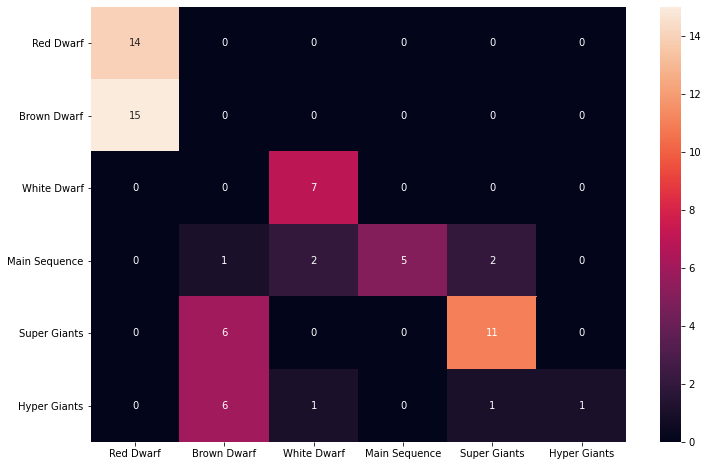

In [ ]:
classes = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']

plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test, result_knn_50), annot=True,
            xticklabels = classes, yticklabels = classes)

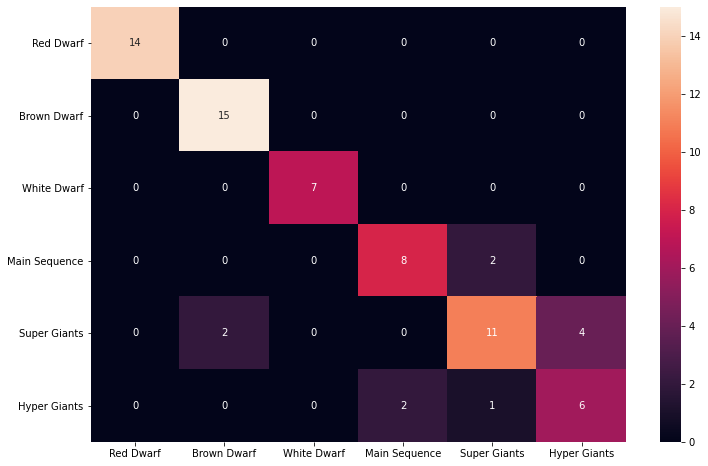

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test, result_knn_10), annot=True,
            xticklabels = classes, yticklabels = classes)

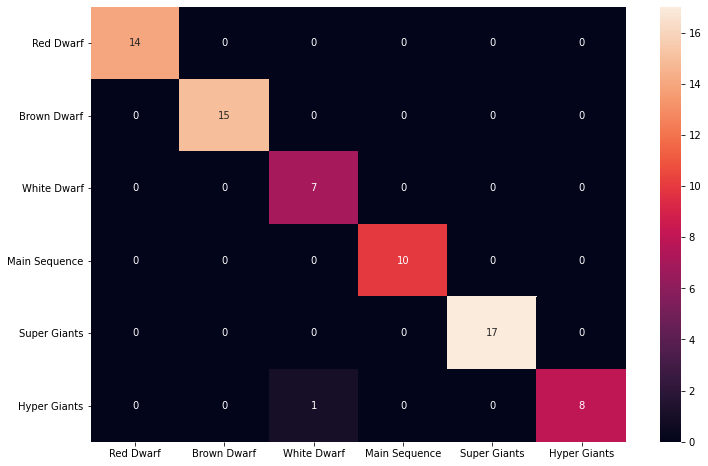

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test, result_knn_5), annot=True,
            xticklabels = classes, yticklabels = classes)

In [ ]:
item = knn_50.predict(X_test.iloc[0].to_numpy().reshape(1,-1))
print(class_name(item))

Super Giants


## 4.6 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

dtc = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=1, random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
result_dtc = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, result_dtc)
loss_dtc = mean_squared_error(y_test, result_dtc)

print('Decision Tree Acc: {:.2f},  Decision Tree Loss: {:.2f}'.format(accuracy_dtc, loss_dtc))

Decision Tree Acc: 1.00,  Decision Tree Loss: 0.00


In [ ]:
print(classification_report(y_test, result_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00         9

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



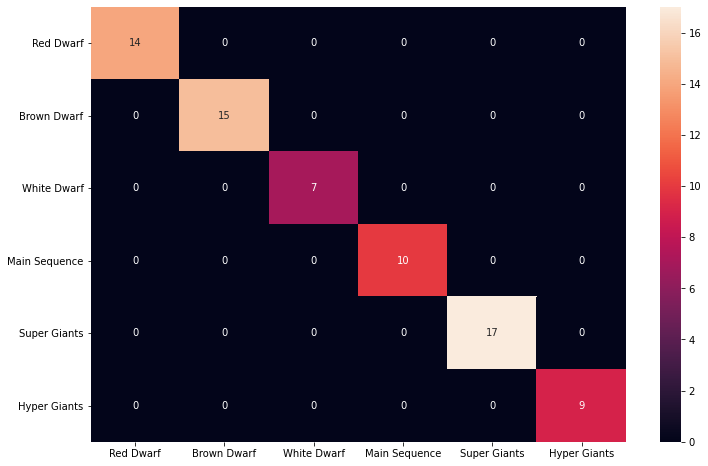

In [ ]:
classes = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']

plt.figure(figsize = (12,8))
sns.heatmap(confusion_matrix(y_test, result_dtc), annot=True,
            xticklabels = classes, yticklabels = classes)

In [ ]:
item = dtc.predict(X_test.iloc[0].to_numpy().reshape(1,-1))
print(class_name(item))

Super Giants


# 5.Model Analysis

## 5.1 Naive Bayes

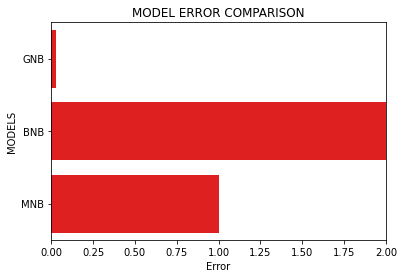

In [ ]:
import pandas as pd
loss = {'Loss':[loss_gnb, loss_bnb, loss_mnb], 'Model':['GNB', 'BNB', 'MNB']}
Loss = pd.DataFrame(loss)

sns.barplot(x="Loss", y="Model", data=Loss, color="r")
plt.xlabel("Error")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ERROR COMPARISON")
plt.show()

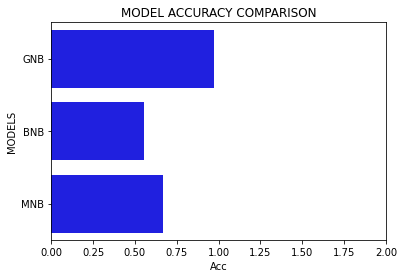

In [ ]:
acc = {'Acc':[accuracy_gnb, accuracy_bnb, accuracy_mnb], 'Model':['GNB', 'BNB', 'MNB']}
Acc = pd.DataFrame(acc)

sns.barplot(x="Acc", y="Model", data=Acc, color="b")
plt.xlabel("Acc")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

## 5.2 SVM

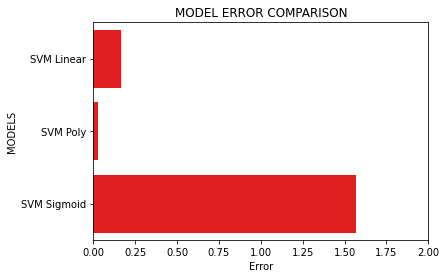

In [ ]:
loss = {'Loss':[loss_svc_l, loss_svc_p, loss_svc_s], 'Model':['SVM Linear', 'SVM Poly', 'SVM Sigmoid']}
Loss = pd.DataFrame(loss)

sns.barplot(x="Loss", y="Model", data=Loss, color="r")
plt.xlabel("Error")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ERROR COMPARISON")
plt.show()

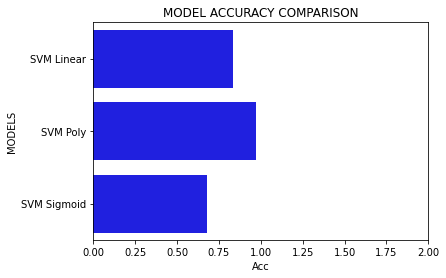

In [ ]:
acc = {'Acc':[accuracy_svc_l, accuracy_svc_p, accuracy_svc_s], 'Model':['SVM Linear', 'SVM Poly', 'SVM Sigmoid']}
Acc = pd.DataFrame(acc)

sns.barplot(x="Acc", y="Model", data=Acc, color="b")
plt.xlabel("Acc")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

## 5.3 Neural Network

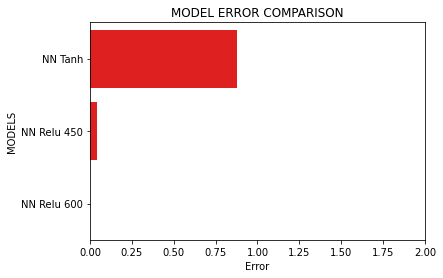

In [ ]:
loss = {'Loss':[loss_clf_t, loss_clf450_r, loss_clf600_r], 'Model':['NN Tanh', 'NN Relu 450', 'NN Relu 600']}
Loss = pd.DataFrame(loss)

sns.barplot(x="Loss", y="Model", data=Loss, color="r")
plt.xlabel("Error")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ERROR COMPARISON")
plt.show()

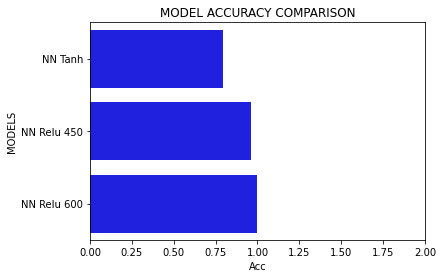

In [ ]:
acc = {'Acc':[accuracy_clf_t, accuracy_clf450_r, accuracy_clf600_r], 'Model':['NN Tanh', 'NN Relu 450', 'NN Relu 600']}
Acc = pd.DataFrame(acc)

sns.barplot(x="Acc", y="Model", data=Acc, color="b")
plt.xlabel("Acc")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

## 5.4 K-NN

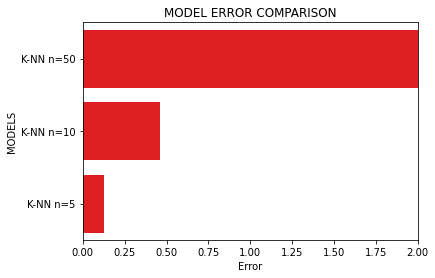

In [ ]:
loss = {'Loss':[loss_knn_50, loss_knn_10, loss_knn_5], 'Model':['K-NN n=50', 'K-NN n=10', 'K-NN n=5']}
Loss = pd.DataFrame(loss)

sns.barplot(x="Loss", y="Model", data=Loss, color="r")
plt.xlabel("Error")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ERROR COMPARISON")
plt.show()

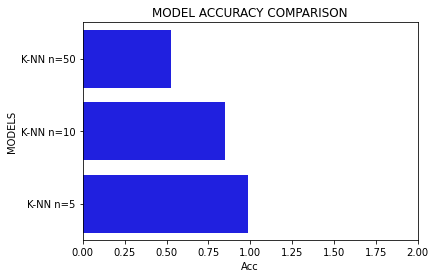

In [ ]:
acc = {'Acc':[accuracy_knn_50, accuracy_knn_10, accuracy_knn_5], 'Model':['K-NN n=50', 'K-NN n=10', 'K-NN n=5']}
Acc = pd.DataFrame(acc)

sns.barplot(x="Acc", y="Model", data=Acc, color="b")
plt.xlabel("Acc")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

## 5.5 Decision Tree

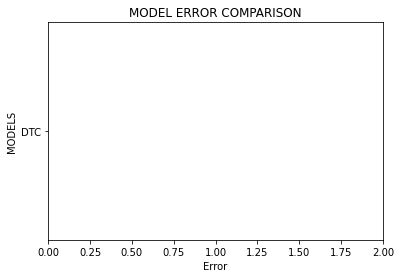

In [ ]:
loss = {'Loss':[loss_dtc], 'Model':['DTC']}
Loss = pd.DataFrame(loss)

sns.barplot(x="Loss", y="Model", data=Loss, color="r")
plt.xlabel("Error")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ERROR COMPARISON")
plt.show()

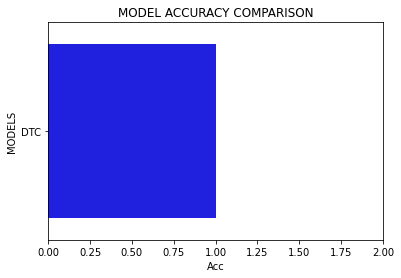

In [ ]:
acc = {'Acc':[accuracy_dtc], 'Model':['DTC']}
Acc = pd.DataFrame(acc)

sns.barplot(x="Acc", y="Model", data=Acc, color="b")
plt.xlabel("Acc")
plt.ylabel("MODELS")
plt.xlim(0,2)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

# 6. Dataset

In [ ]:
#https://www.kaggle.com/brsdincer/star-type-classification/metadata 